In [1]:
import pandas as pd
import numpy as np

# CSV 파일 로드
df = pd.read_csv('../merged_dataset/double_train/double_train.csv')
df.drop(['Label', 'Frame'], axis=1, inplace=True)

In [2]:
# 숫자형 특성만을 대상으로 함
numerical_cols = df.select_dtypes(include=[np.number]).columns

# 각 숫자형 특성에 대해 동적으로 구간을 나누어 빈도수 계산
for col in numerical_cols:
    # 최소값과 최대값을 기반으로 구간 경계값 설정
    min_value, max_value = df[col].min(), df[col].max()
    bins = np.linspace(min_value, max_value, num=5)  # 예를 들어, 각 특성을 4개 구간으로 나눔

    # 구간 나누기 및 레이블 설정
    labels = [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins)-1)]
    df[f'{col}_bin'] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)

    # 구간별 빈도수 계산
    print(f"{col} 구간별 빈도수:")
    print(df[f'{col}_bin'].value_counts())
    print("\n")

Head 구간별 빈도수:
Head_bin
601.00-761.00    316
281.00-441.00    283
441.00-601.00    276
121.00-281.00    228
Name: count, dtype: int64


Neck 구간별 빈도수:
Neck_bin
335.00-548.25     441
548.25-761.50     400
761.50-974.75     261
974.75-1188.00      1
Name: count, dtype: int64


RShoulder_X 구간별 빈도수:
RShoulder_X_bin
342.00-423.50    760
423.50-505.00    231
505.00-586.50     76
586.50-668.00     36
Name: count, dtype: int64


RShoulder_Y 구간별 빈도수:
RShoulder_Y_bin
654.50-799.25    376
509.75-654.50    276
365.00-509.75    246
799.25-944.00    205
Name: count, dtype: int64


LShoulder_X 구간별 빈도수:
LShoulder_X_bin
522.50-603.75    855
603.75-685.00    126
360.00-441.25     62
441.25-522.50     60
Name: count, dtype: int64


LShoulder_Y 구간별 빈도수:
LShoulder_Y_bin
654.50-799.25    399
365.00-509.75    273
509.75-654.50    246
799.25-944.00    185
Name: count, dtype: int64


RElbow_X 구간별 빈도수:
RElbow_X_bin
291.00-411.00    947
411.00-531.00     64
651.00-771.00     49
531.00-651.00     43
Name: count, dt

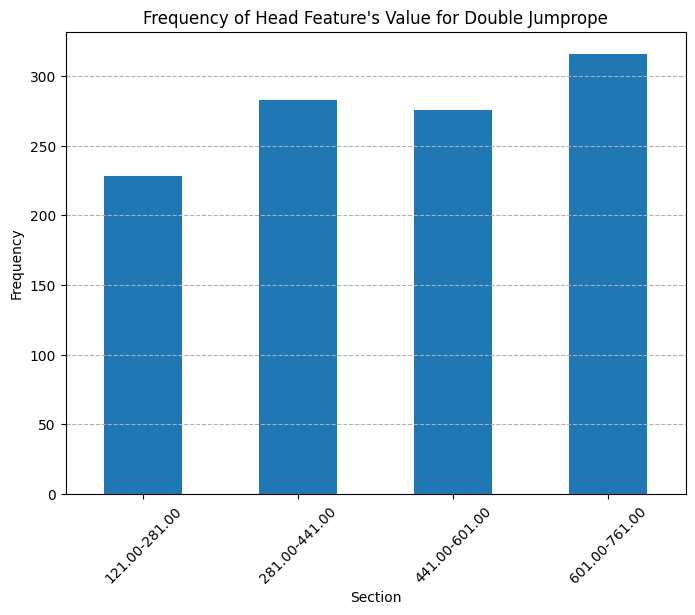

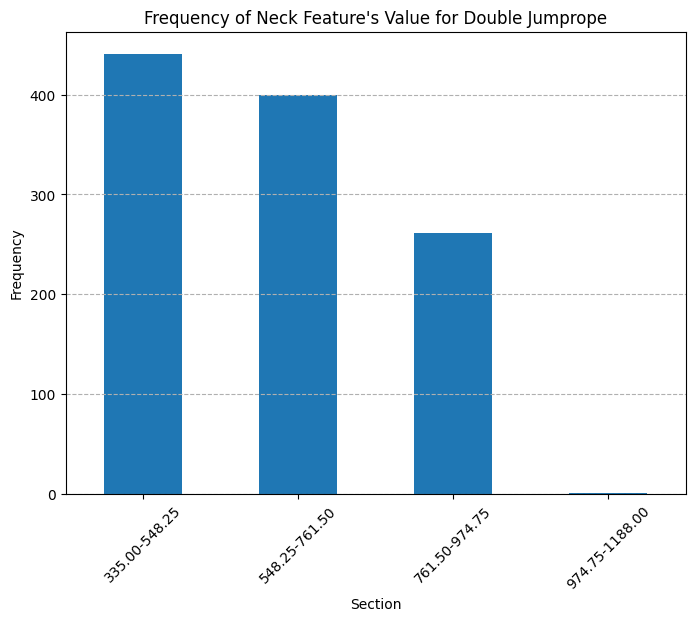

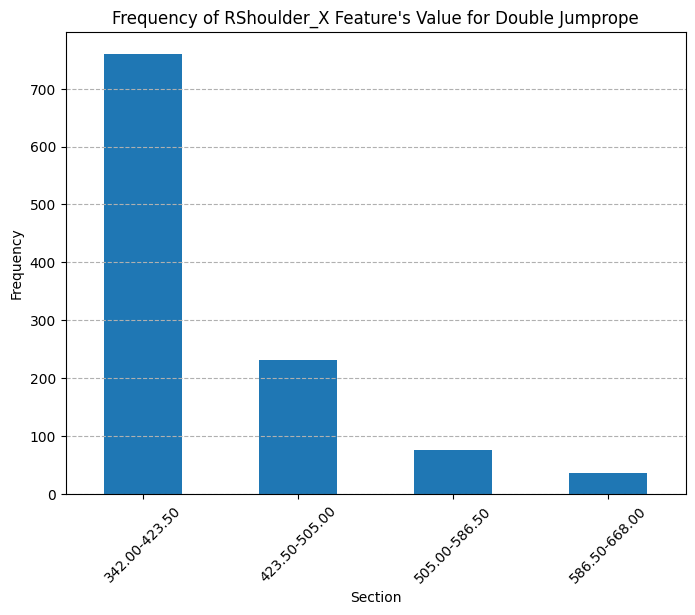

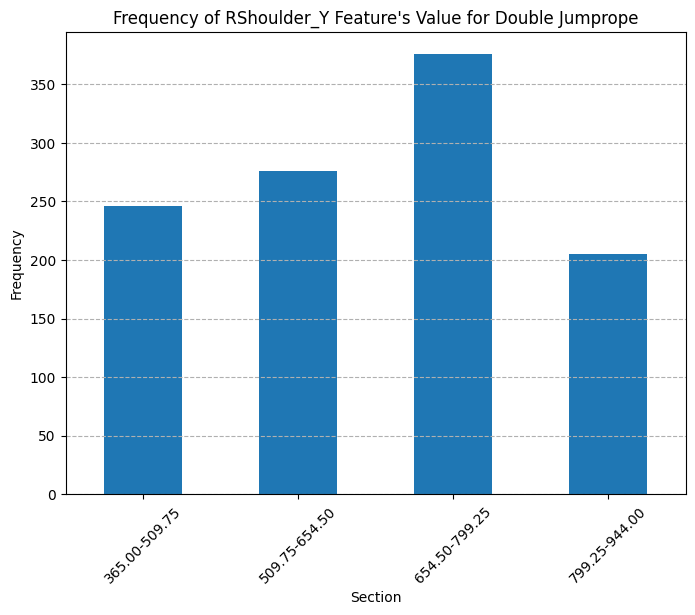

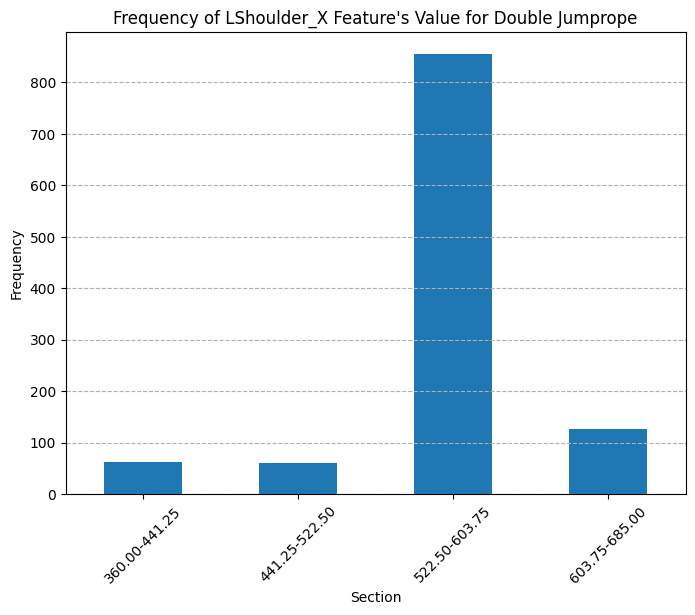

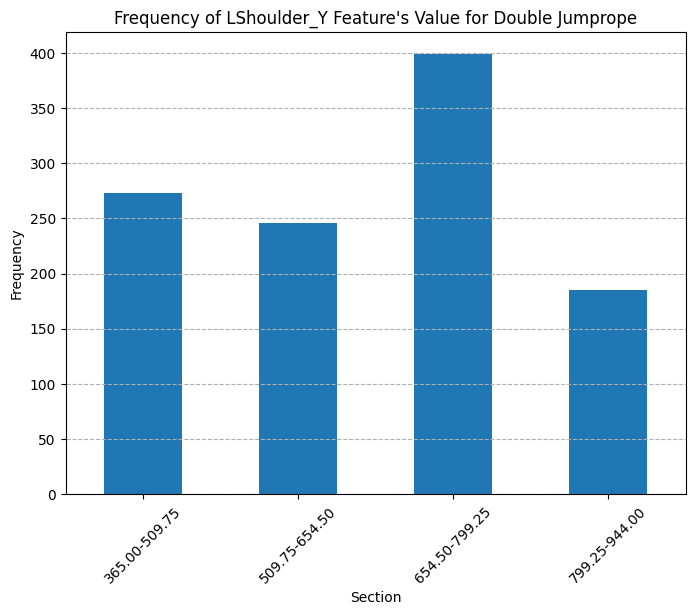

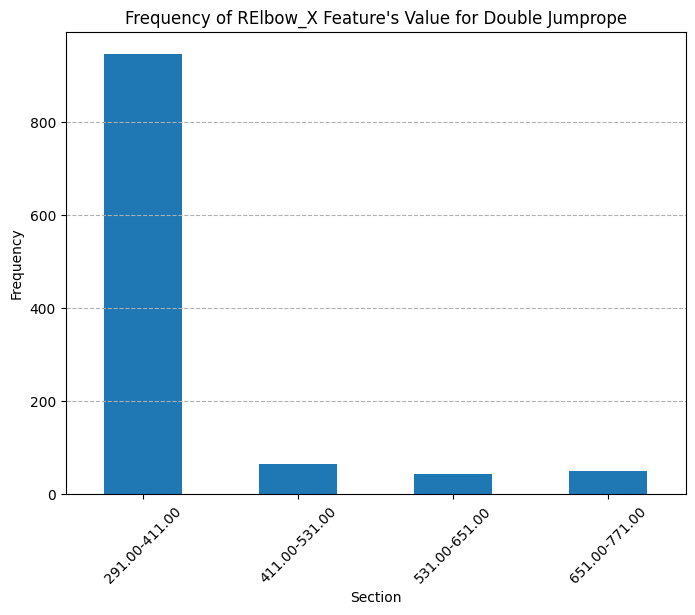

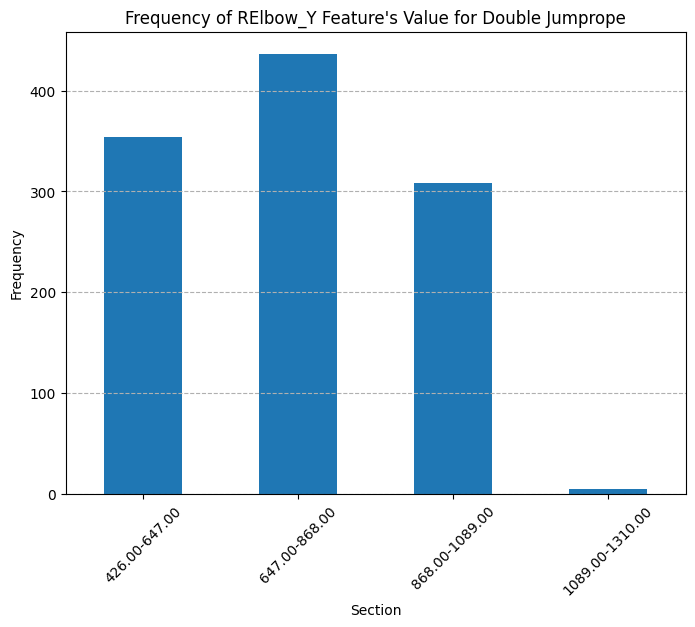

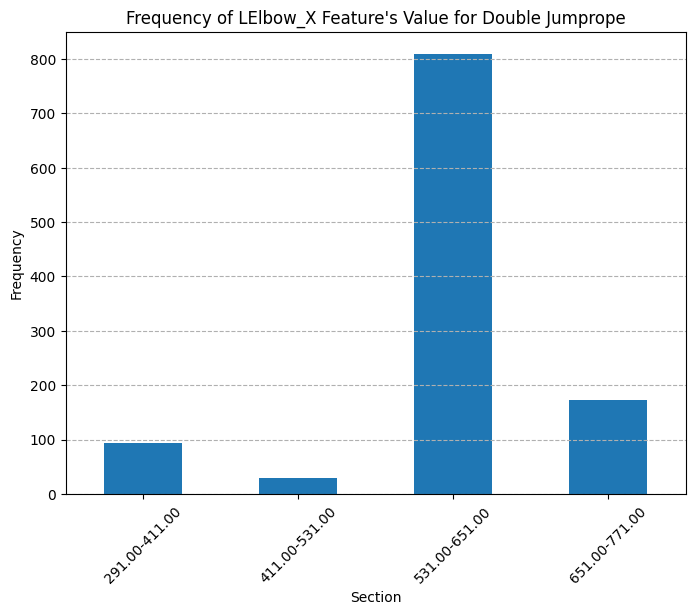

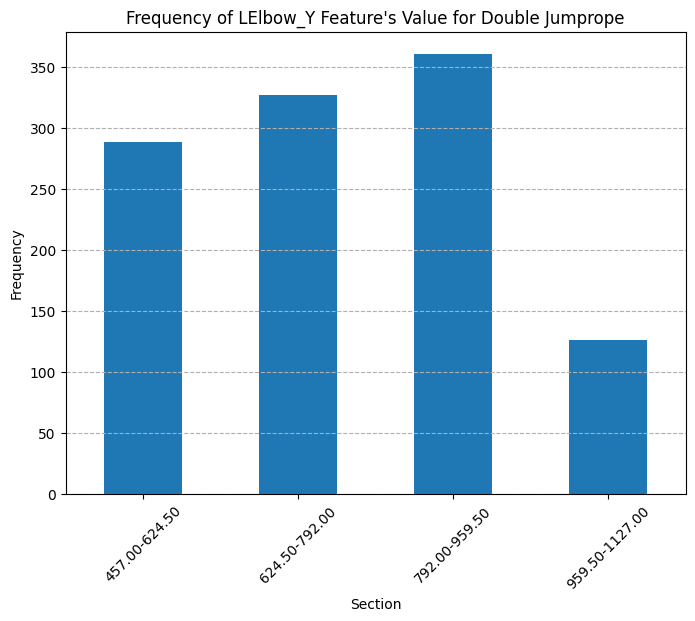

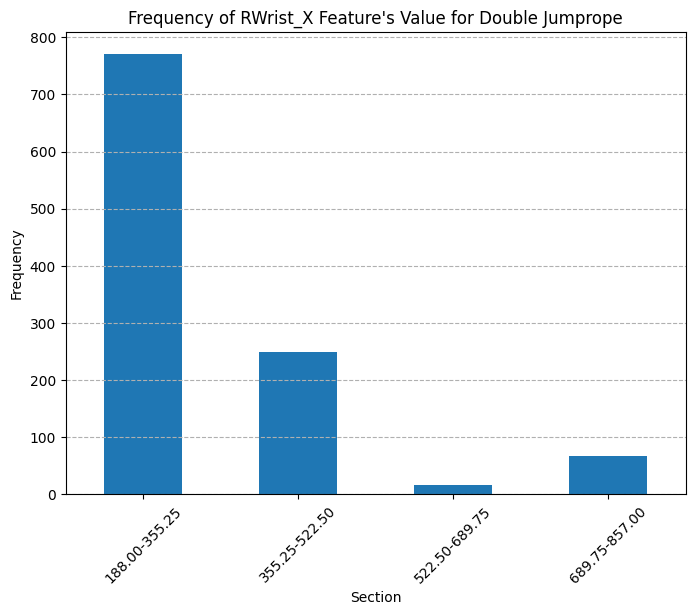

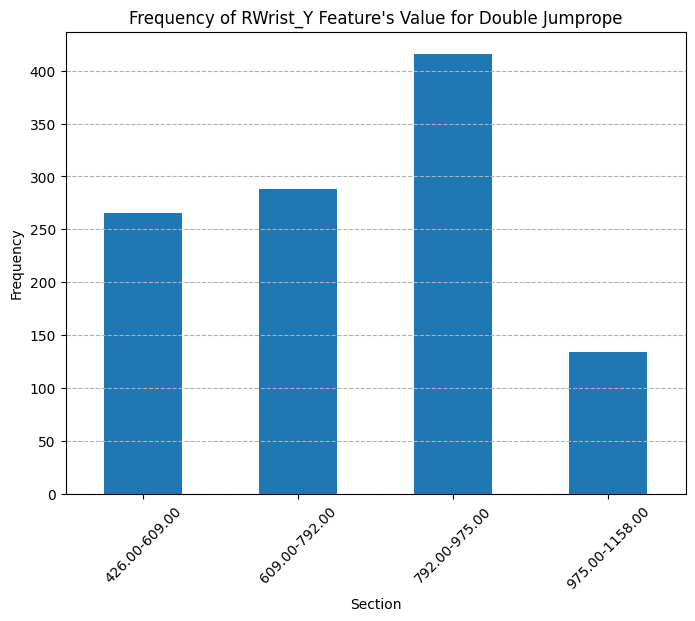

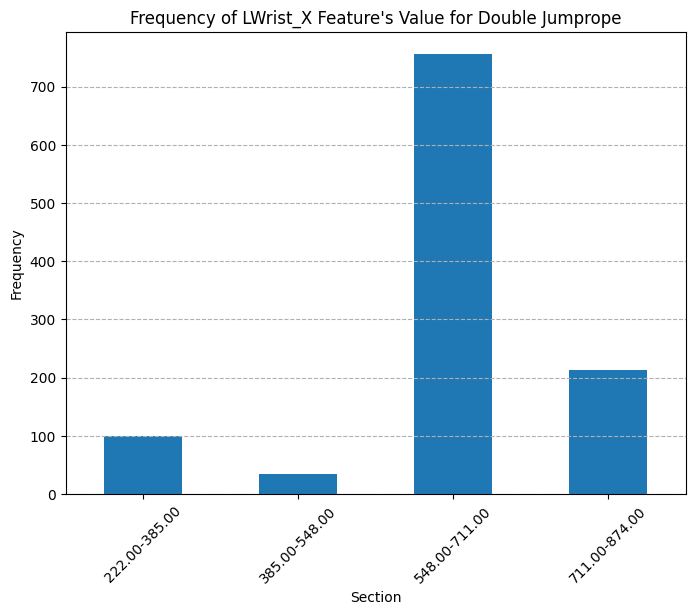

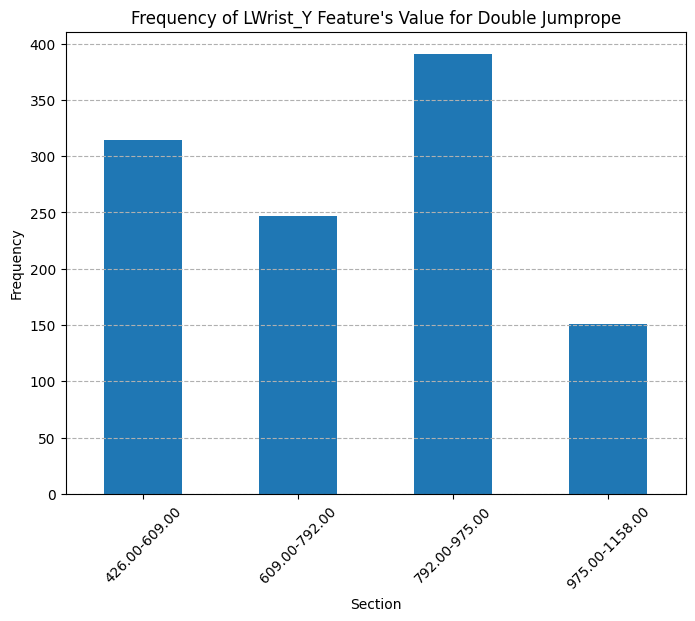

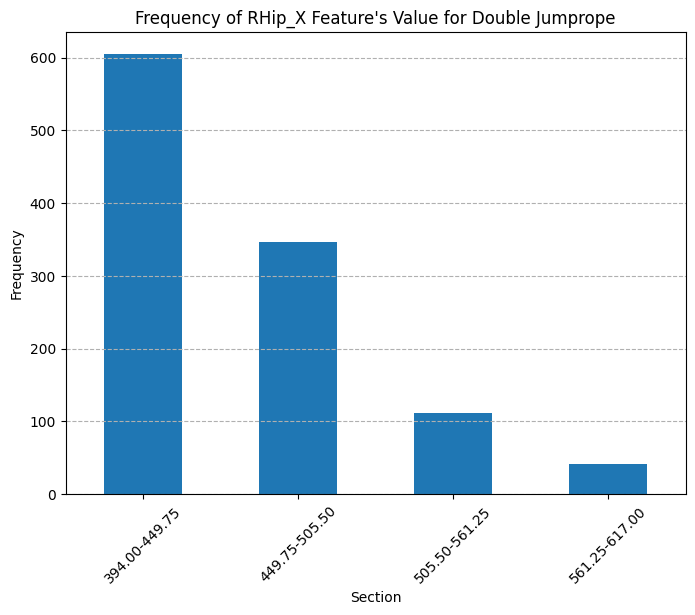

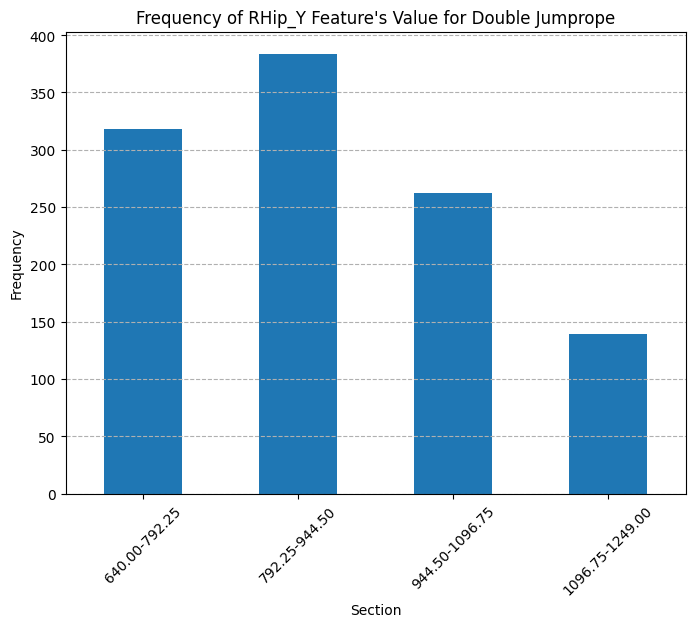

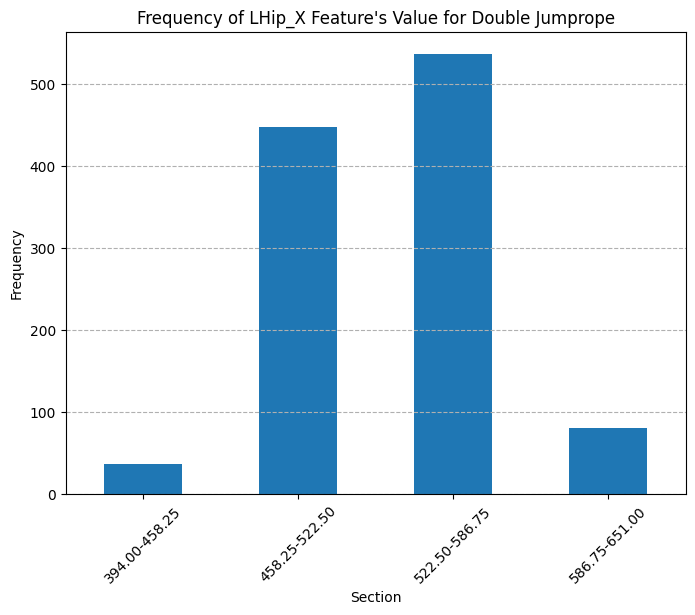

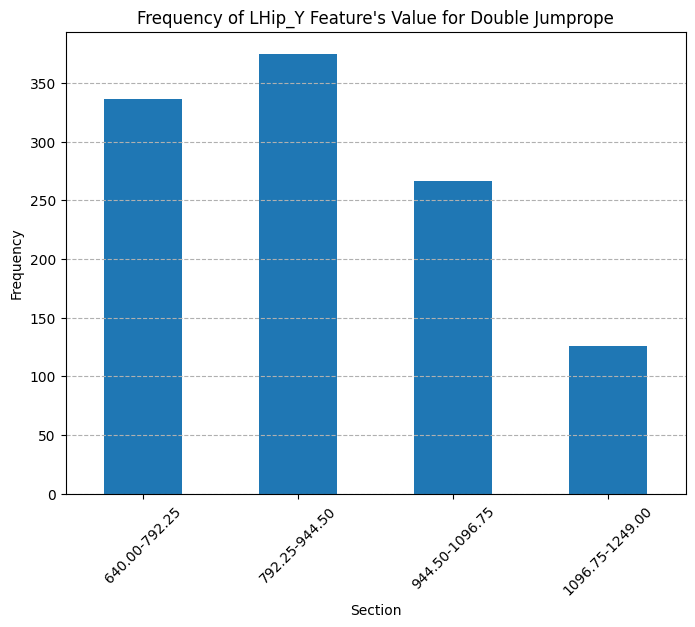

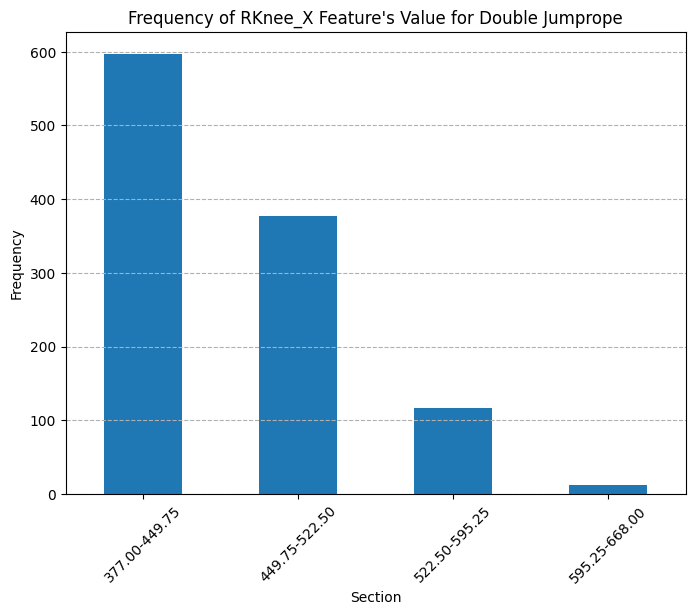

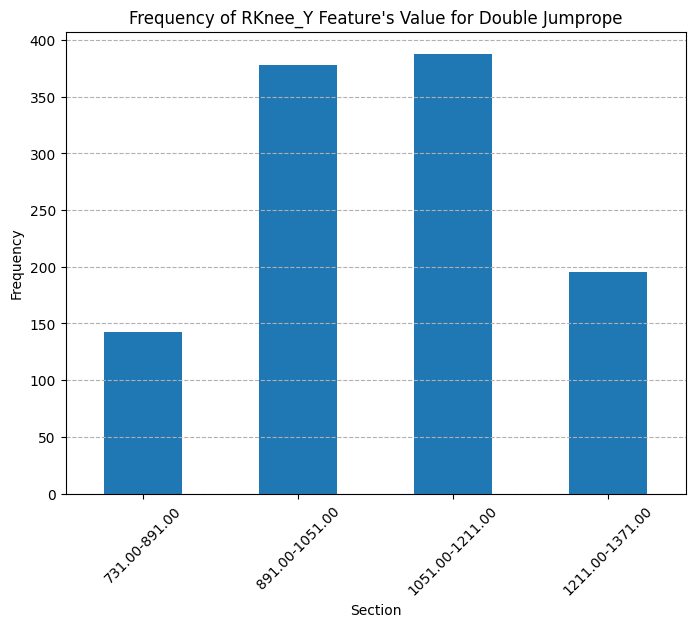

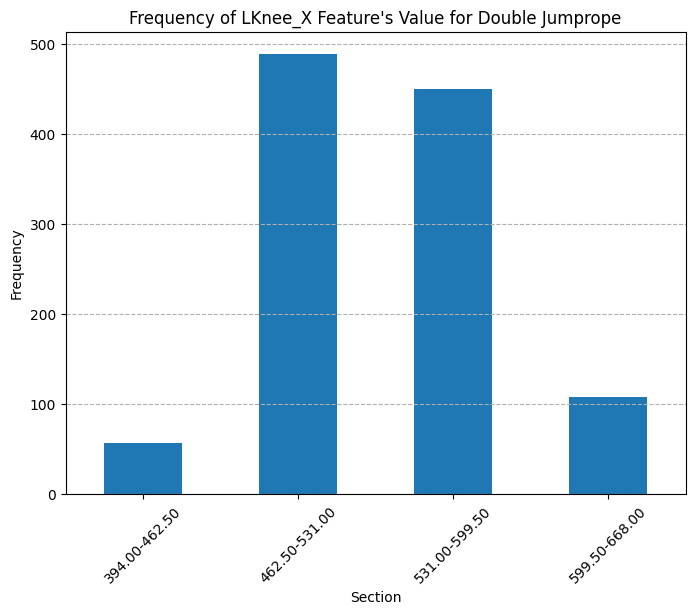

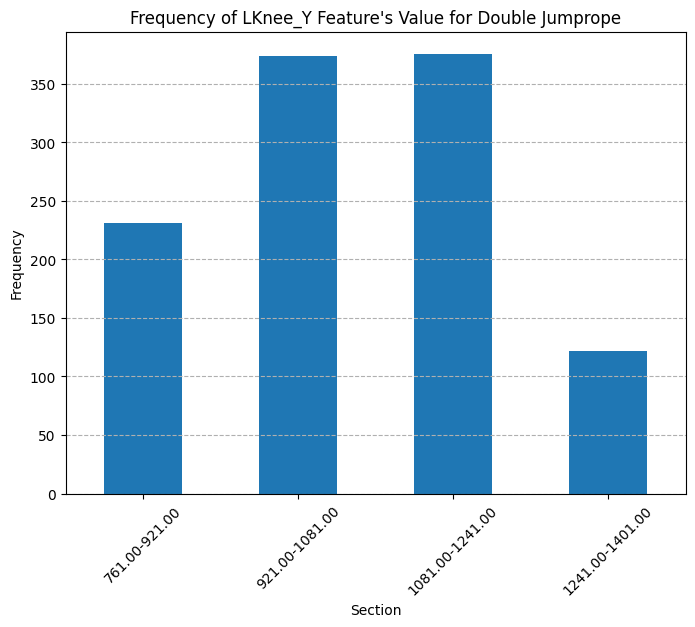

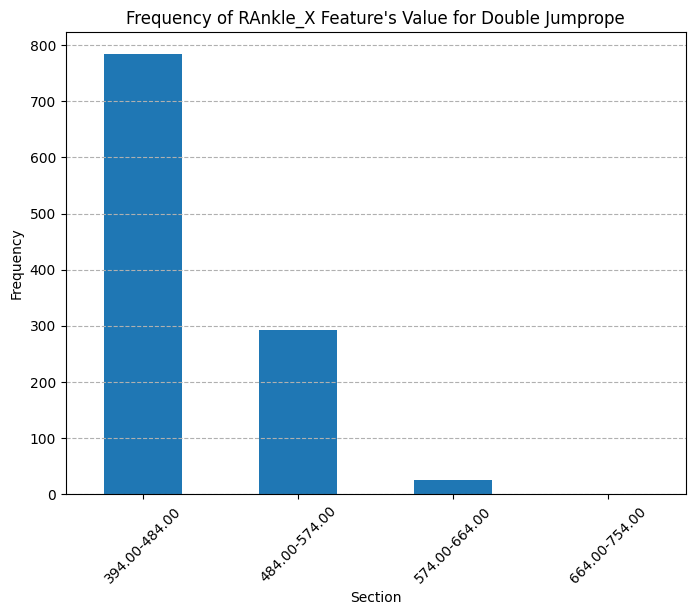

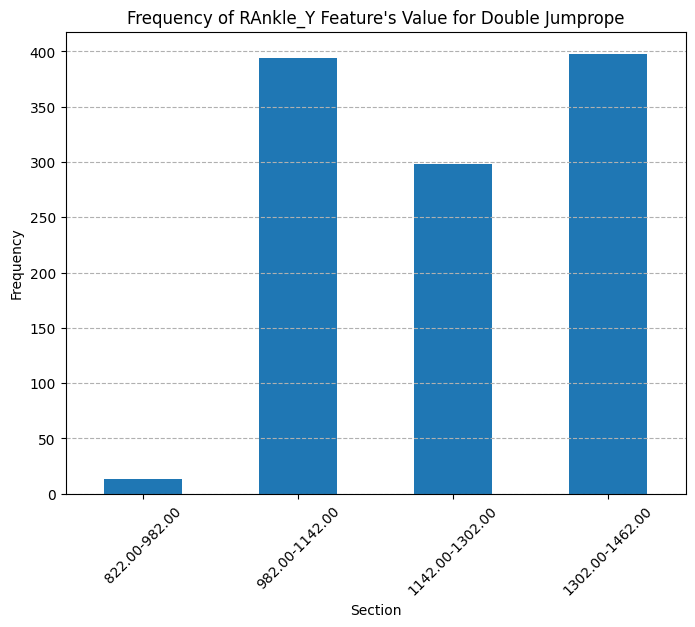

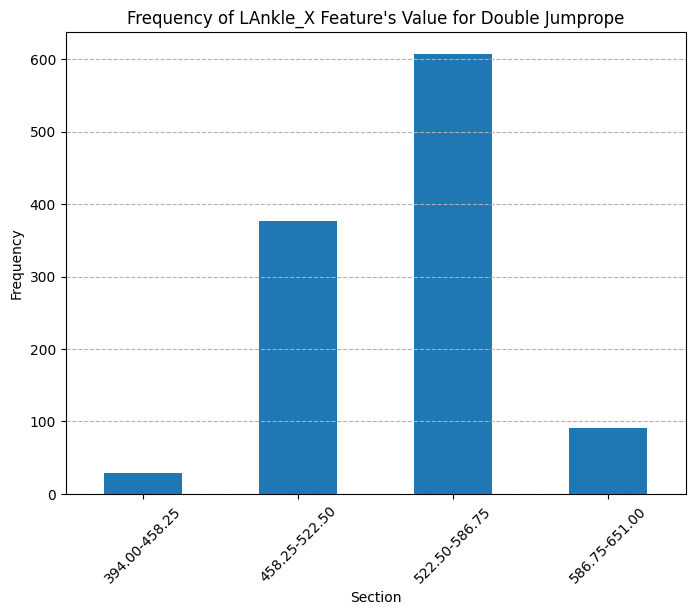

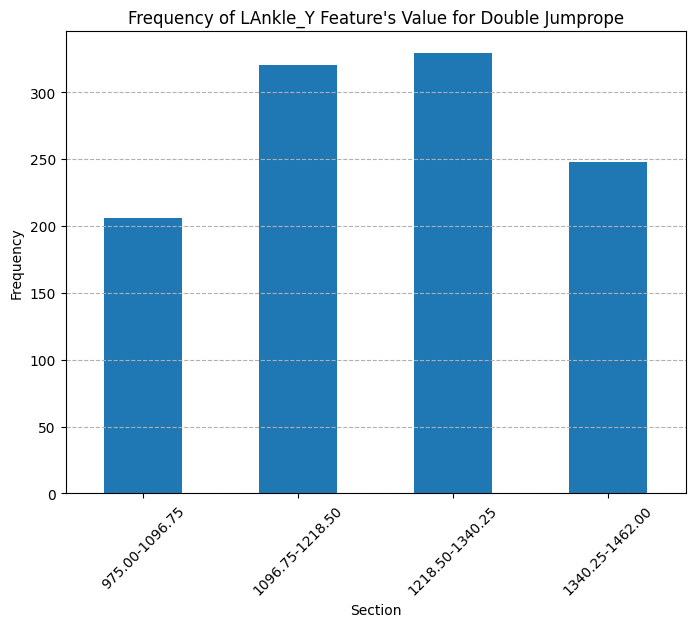

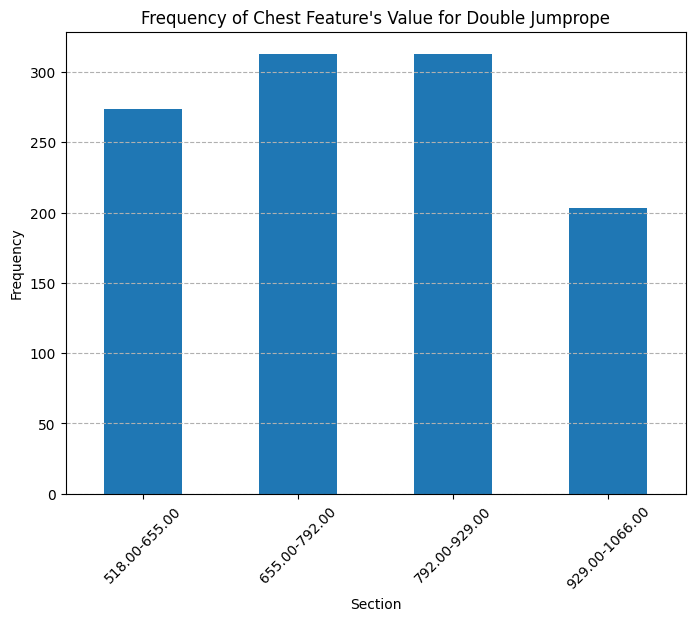

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 숫자형 특성만을 대상으로 함
numerical_cols = df.select_dtypes(include=[np.number]).columns

# 각 숫자형 특성에 대해 동적으로 구간을 나누어 빈도수 계산 및 시각화
for col in numerical_cols:
    # 최소값과 최대값을 기반으로 구간 경계값 설정
    min_value, max_value = df[col].min(), df[col].max()
    bins = np.linspace(min_value, max_value, num=5)  # 예를 들어, 각 특성을 4개 구간으로 나눔

    # 구간 나누기 및 레이블 설정
    labels = [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins)-1)]
    df[f'{col}_bin'] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)

    # 구간별 빈도수 계산
    frequency = df[f'{col}_bin'].value_counts(sort=False)

    # 막대 그래프 시각화
    plt.figure(figsize=(8, 6))
    frequency.plot(kind='bar')
    plt.title(f'Frequency of {col} Feature\'s Value for Double Jumprope')
    plt.xlabel('Section')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.grid(axis='y', linestyle='--')
    plt.show()
